In [1]:
import omf
import pyvista as pv
import omfvista
import numpy as np

## Open an OMF Project file 

In [2]:
proj = omf.Project(
    name='Test project',
    description='Just some assorted elements',
    
)


In [4]:
pts = omf.PointSetElement(
    name='Random Points',
    description='Just random points',
    geometry=omf.PointSetGeometry(vertices=np.random.rand(100, 3)),
    data=[
        omf.ScalarData(
            name='rand data',
            array=np.random.rand(100),
            location='vertices',
        ),
        omf.ScalarData(
            name='More rand data',
            array=np.random.rand(100),
            location='vertices',
        ),
    ],
    textures=[
        omf.ImageTexture(
            name='test image',
            image='test_image.png',
            origin=[0, 0, 0],
            axis_u=[1, 0, 0],
            axis_v=[0, 1, 0],
        ),
        omf.ImageTexture(
            name='test image',
            image='test_image.png',
            origin=[0, 0, 0],
            axis_u=[1, 0, 0],
            axis_v=[0, 0, 1],
        ),
    ],
    color='green',
)

In [5]:
    segments=np.floor(np.random.rand(50, 2)*100).astype(int),


In [6]:
lin = omf.LineSetElement(
    name='Random Line',
    geometry=omf.LineSetGeometry(vertices=np.random.rand(100, 3),
                                  segments=np.floor(np.random.rand(50, 2)*100).astype(int)),
    data=[
        omf.ScalarData(
            name='rand vert data',
            array=np.random.rand(100),
            location='vertices',
        ),
        omf.ScalarData(
            name='rand segment data',
            array=np.random.rand(50),
            location='segments',
        ),
    ],
    #color='green',
)

In [7]:
surf = omf.SurfaceElement(
    name='trisurf',
    geometry=omf.SurfaceGeometry(
        vertices=np.random.rand(100, 3),
        triangles=np.floor(np.random.rand(50, 3)*100).astype(int)
    ),
    data=[
        omf.ScalarData(
            name='rand vert data',
            array=np.random.rand(100),
            location='vertices'
        ),
        omf.ScalarData(
            name='rand face data',
            array=np.random.rand(50),
            location='faces'
        )
    ],
    color=[100, 200, 200]
)

In [8]:
grid = omf.SurfaceElement(
    name='gridsurf',
    geometry=omf.SurfaceGridGeometry(
        tensor_u=np.ones(10).astype(float),
        tensor_v=np.ones(15).astype(float),
        origin=[50., 50., 50.],
        axis_u=[1., 0, 0],
        axis_v=[0, 0, 1.],
        offset_w=np.random.rand(11, 16).flatten()
    ),
    data=[
        omf.ScalarData(
            name='rand vert data',
            array=np.random.rand(11, 16).flatten(),
            location='vertices'
        ),
        omf.ScalarData(
            name='rand face data',
            array=np.random.rand(10, 15).flatten(order='f'),
            location='faces'
        )
    ],
    textures=[
        omf.ImageTexture(
            name='test image',
            image='test_image.png',
            origin=[2., 2., 2.],
            axis_u=[5., 0, 0],
            axis_v=[0, 2., 5.]
        )
    ]
)

In [9]:
vol = omf.VolumeElement(
    name='vol',
    geometry=omf.VolumeGridGeometry(
        tensor_u=np.ones(10).astype(float),
        tensor_v=np.ones(15).astype(float),
        tensor_w=np.ones(20).astype(float),
        origin=[10., 10., -10]
    ),
    data=[
        omf.ScalarData(
            name='Random Data',
            location='cells',
            array=np.random.rand(10, 15, 20).flatten()
        )
    ]
)

In [10]:
proj.elements = [pts, lin, surf, grid, vol]

In [11]:
assert proj.validate()

In [12]:
omf.OMFWriter(proj, 'omfproj.omf')


In [13]:
proj = omfvista.load_project('omfproj.omf')


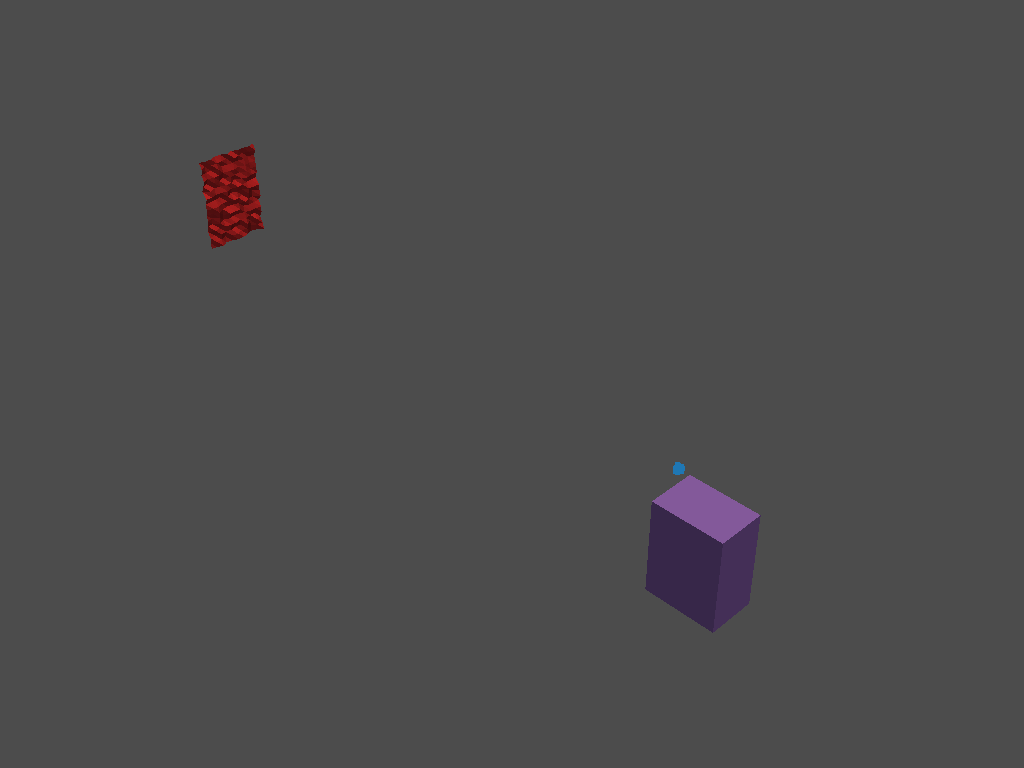

In [15]:
proj.plot(multi_colors=True)